### 1. Importing Required Modules and Packages

In [23]:
import os
import sys

sys.path.append('..')
os.environ["OMP_NUM_THREADS"] = '1'  # KMeans is not parallelized, so set to 1 thread

from src.mutation import Mutation
from src.sequence import Vector, Gene
from src.eblocks import Eblock, EblockDesign
import biotite.sequence as seq
from src.primer import DesignPrimers
from src.plot import Plot

%reload_ext autoreload
%autoreload 2

### 2. Loading and Analyzing the Gene Sequence

The desired mutations should be added to a txt file. 
Here, we create a Mutation() object and parse the specified mutations. 

In [32]:
# Create a Mutation object and parse the input mutations from the files/ directory

mutations_file = "/zfsdata/data/rosan/eBlocks/testset_input/Mtb_pINIT_DnaE1/datasets/N10/N10_5_mutations.txt"
# mutations_file = os.path.join('DnaE1_original', 'mutations.txt')

mutation_instance = Mutation()
mutation_instance.parse_mutations(mutations_file)

# Print the mutations that were parsed
mutation_instance.print_mutations()

The selected mutations are:
	Insert    	G3-QADHWF 
	Deletion  	S60-I69   
	Insert    	L88-VDLAEIA
	Insert    	E113-SEHKESK
	Deletion  	N114-N120 
	Mutation  	L124T     
	Insert    	A146-LIMMMEGVK
	Insert    	T165-SS   
	Combined  	Q171F, P188F, D189R
	Mutation  	W182W     
	Deletion  	R207-G214 
	Deletion  	A235-E239 
	Insert    	Q245-GMRHCV
	Combined  	N254E, W275T, E278N, D261H
	Mutation  	A327V     
	Deletion  	S369-A371 
	Mutation  	A371F     
	Mutation  	A393Q     
	Insert    	D398-FAMMGL
	Mutation  	P473H     
	Mutation  	E512L     
	Mutation  	G541C     
	Mutation  	T555K     
	Combined  	R592R, K622N
	Mutation  	D640T     
	Combined  	A675D, A705G, Q716R
	Combined  	E698Q, I711E, M739I, G740I
	Combined  	R719K, K743A, L735L
	Deletion  	R719-Y727 
	Combined  	P806S, S852E, V853G
	Deletion  	V817-V826 
	Combined  	L861Y, K910P, T905G, V864D, D890L
	Deletion  	D896-A899 
	Combined  	S929T, G945S
	Insert    	A931-EKQYVA
	Combined  	R1025Y, G1041N, T1053I, N1040D, G1069V
	Insert    

Next, we read the gene sequence and the vector that contains our gene of interest.

In [33]:
# Create a Plasmid object and parse the input plasmid from the files/ directory

# Read sequence
sequence_file = "/zfsdata/data/rosan/eBlocks/testset_input/Mtb_pINIT_DnaE1/A0QX55.fasta"
vector_file = "/zfsdata/data/rosan/eBlocks/testset_input/Mtb_pINIT_DnaE1/dnae1-pinit.gb"

gene_instance = Gene()
gene_instance.parse_sequence(sequence_file)
vector_instance = Vector(gene=gene_instance)
vector_instance.parse_vector(vector_file)

We also define an output directory for the generated files and create a snapgene object for visualization

We create an eBlockDesign instance that can initiate the design of the eblocks. Here, we choose as optimization method cost_optimization that aims to use as little basepairs as possible. Another option would be to do amount_optimization, that aims to cluster as many mutations as possible together, to get the lowest number of different eBlocks

In [34]:
# Create an Eblocks object based on the input mutations and the gene sequence

output_dir = "/zfsdata/data/rosan/eBlocks/testset_output/Mtb_pINIT_DnaE1/N10"

design_instance = EblockDesign(mutation_instance=mutation_instance,
                            gene_instance=gene_instance,
                            vector_instance=vector_instance,
                            output_dir=output_dir,
                            verbose=True,
                            cost_optimization=True,
                            amount_optimization=False)

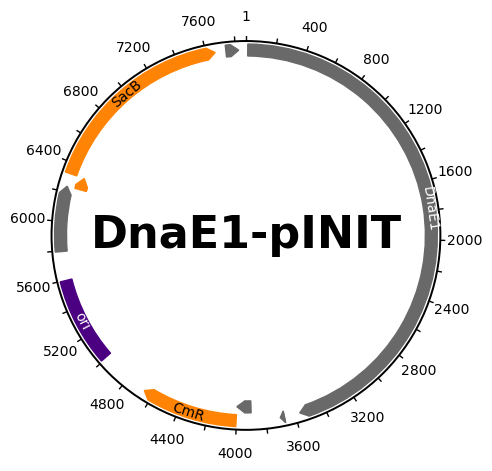

In [35]:
# Create a Plots object and check the input vector

# Create the Plot object
plot_instance = Plot(mutation_instance=mutation_instance,
                    eblocks_design_instance=design_instance,
                    vector_instance=vector_instance,
                    gene_instance=gene_instance,
                    output_dir=output_dir,
                    show=True)

# Check the input vector
plot_instance.plot_vector(figsize=(5, 5));

In [37]:
# Run the eBlocks design and print the results
# design_instance.max_eblock_length = 1400
design_instance.run_design_eblocks()


Calculating relative codon frequencies, based on the selected genome id U00096 ...
Clustering mutations ...
Processing mutation: G3-QADHWF
Processing mutation: S60-I69
Deletion indices: 180, 207
Processing mutation: L88-VDLAEIA
Processing mutation: E113-SEHKESK
Processing mutation: N114-N120
Deletion indices: 342, 360
Processing mutation: L124T
Processing mutation: A146-LIMMMEGVK
Processing mutation: T165-SS
Processing mutation: Q171F-P188F-D189R
Multiple mutation indices: [513, 564, 567]
Multiple mutation constraints: [(9, 27), (180, 207), (264, 285), (339, 360), (342, 360), (438, 465), (495, 501), (513, 564, 567)]
Processing mutation: W182W
Processing mutation: R207-G214
Deletion indices: 621, 642
Processing mutation: A235-E239
Deletion indices: 705, 717
Processing mutation: Q245-GMRHCV
Processing mutation: N254E-W275T-E278N-D261H
Multiple mutation indices: [762, 825, 834, 783]
Multiple mutation constraints: [(9, 27), (180, 207), (264, 285), (339, 360), (342, 360), (438, 465), (495, 

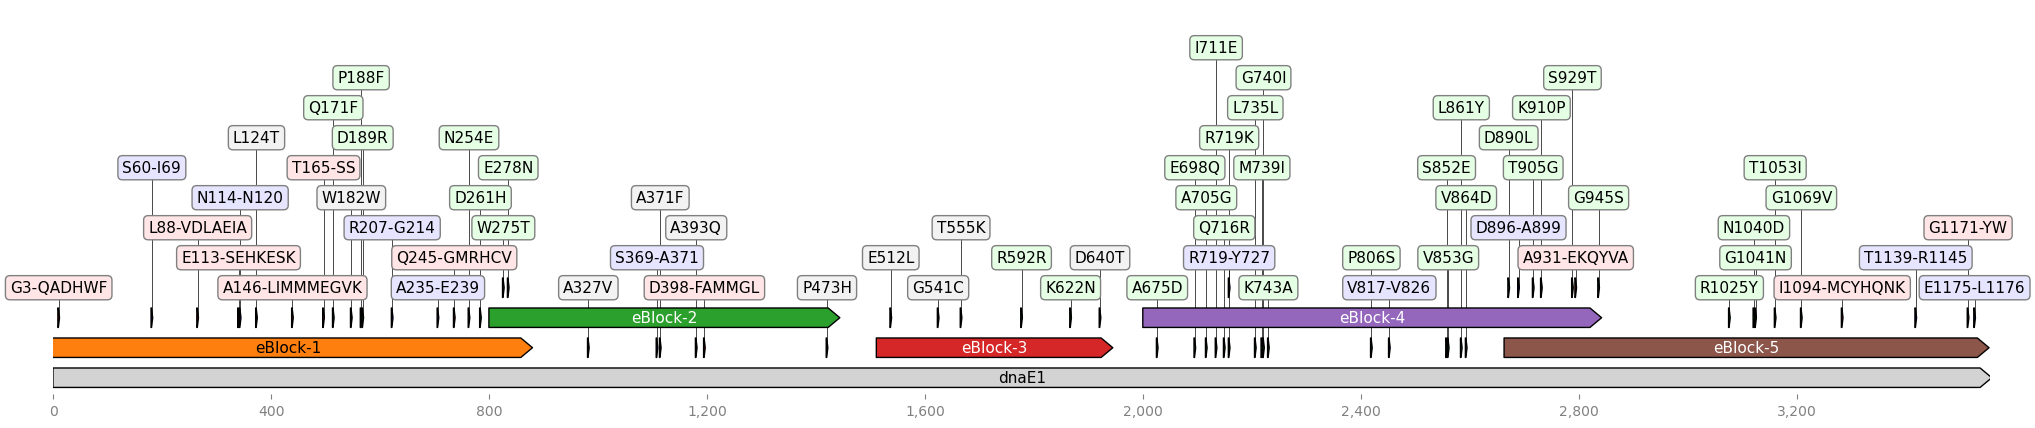

KeyboardInterrupt: 

In [38]:
plot_instance.plot_eblocks_mutations(figure_length=25,
                                     figure_width=5)

In [39]:
# Primer3 settings
settingsfile = '/home/rosan/git/design_gene_blocks/settings/primer3-settings-mild.txt'
seq_settingsfile = '/home/rosan/git/design_gene_blocks/settings/primer3-seq-settings.txt'

primers_instance = DesignPrimers(mutation_instance=mutation_instance,
                eblocks_design_instance=design_instance,
                primers_settingsfile=settingsfile,
                seqprimers_settingsfile=seq_settingsfile,
                vector_instance=vector_instance,
                output_dir=output_dir)

primers_instance.run_design()

Designing primer pairs ...


ValueError: Primer pair not found. Try using less strict settings.

In the process, for each mutation a different eBlock is created and a .gb file is made to easily view the clone in a sequence editor. 

In [ ]:
sequence_file = 'files/A0QX55.fasta'
vector_file = 'files/vector.dna'

sequence_instance = Plasmid()
sequence_instance.parse_vector(vector_file)
sequence_instance.parse_sequence(sequence_file)

sequence_instance.description

In [23]:
from Bio import SeqIO

def read_single_fasta(fp: str) -> str:
    """
    This function reads a single fasta file and returns the sequence.
    """
    for num, record in enumerate(SeqIO.parse(fp, "fasta")):
        sequence = record.seq
        seqid = record.id
        if num > 0:
            raise ValueError("Please provide a single sequence in FASTA format.")
    return sequence, seqid

def read_single_fasta(fp: str) -> str:
    """
    This function reads a single fasta file and returns the sequence.
    """
    record = next(SeqIO.parse(fp, "fasta"))  # Read the first and only record
    sequence = record.seq
    seqid = record.id
    return sequence, seqid

In [ ]:
seq, seqid = read_single_fasta(sequence_file)
print(seq, seqid)
seq, seqid = read_single_fasta2(sequence_file)
print(seq, seqid)